# Grover search: SAT problem

In this notebook I'm going to show how to use qlasskit for solving a SAT problem. A SAT problem, or Boolean satisfiability problem, asks whether a given Boolean formula can be satisfied by assigning true or false values to its variables.

We define our SAT problem writing an oracle function that receive a list of 5 boolean variables, and return the logical AND between all the elements (negating those whose index is even).

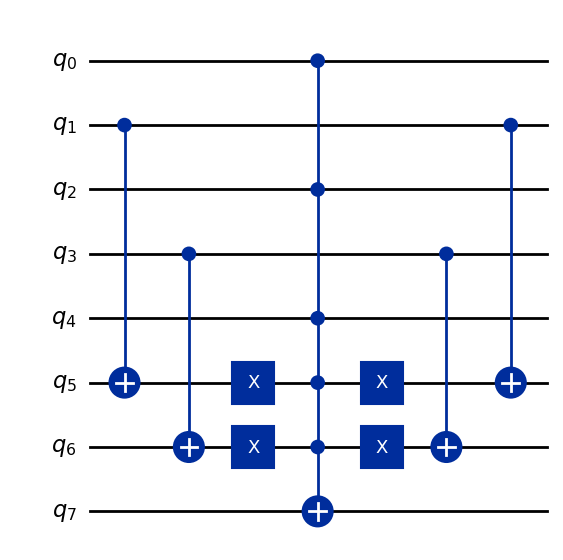

In [10]:
from qlasskit import qlassf, Qlist, Qint, Qint4


@qlassf
def sat(b_list: Qlist[bool, 5]) -> bool:
    r = True
    i = 0
    for b in b_list:
        r = r and (b if i % 2 == 0 else not b)
        i += 1
    return r

sat.export("qiskit").draw("mpl")

Then we use Grover to search for input values leading to a `True` result from our SAT oracle:

In [11]:
from qlasskit.algorithms import Grover

q_algo = Grover(sat, True)
qc = q_algo.export("qiskit")

We use qiskit to run the simulation; as we expected from our simple problem, the solution is the list `[True, False, True, False, True]` where variable in even positions are negated.

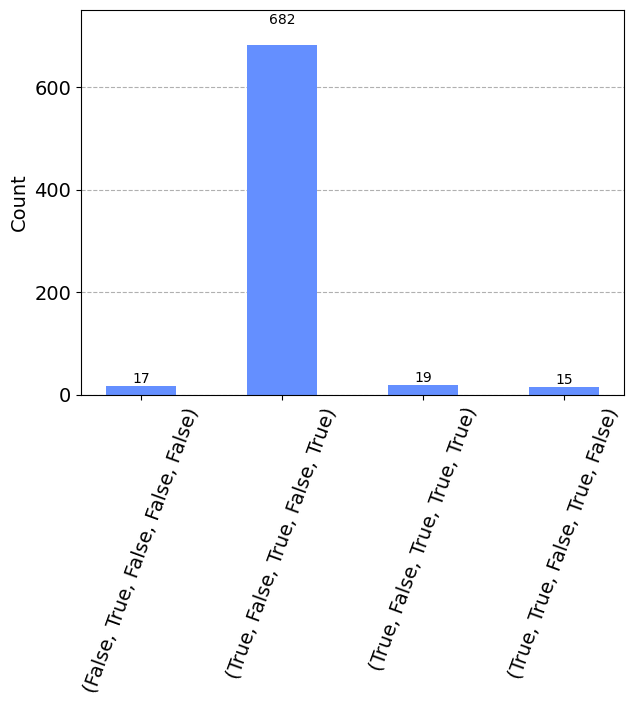

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

qc.measure_all()
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

counts_readable = q_algo.decode_counts(counts, discard_lower=15)
plot_histogram(counts_readable)